Accuracy: 74.03%
Confusion Matrix: {0.0: {0.0: 73, 1.0: 27}, 1.0: {0.0: 13, 1.0: 41}}


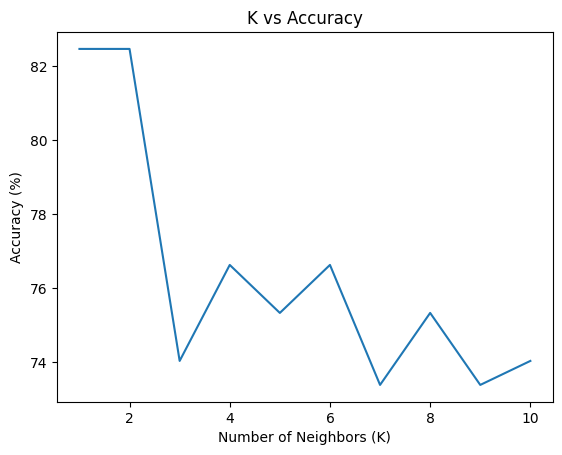

Best K: 1 with accuracy: 82.47%


In [3]:
import math
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(point_a, point_b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point_a, point_b)))

def split_dataset(dataset, ratio=0.8):
    random.shuffle(dataset)
    index = int(len(dataset) * ratio)
    return dataset[:index], dataset[index:]

def knn_classifier(training_set, sample_point, num_neighbors):
    distances = [(euclidean_distance(sample_point[:-1], train_point[:-1]), train_point[-1]) for train_point in training_set]
    nearest_neighbors = sorted(distances, key=lambda x: x[0])[:num_neighbors]

    neighbor_classes = [neighbor[1] for neighbor in nearest_neighbors]
    predicted_class = Counter(neighbor_classes).most_common(1)[0][0]

    return predicted_class

def calculate_accuracy(true_values, predicted_values):
    correct_count = sum(1 for true, pred in zip(true_values, predicted_values) if true == pred)
    return correct_count / len(true_values) * 100

def generate_confusion_matrix(true_values, predicted_values, class_labels):
    matrix = {label: {label: 0 for label in class_labels} for label in class_labels}
    for true, pred in zip(true_values, predicted_values):
        if true is not None and pred is not None:
            matrix[true][pred] += 1
    return matrix

def evaluate_k_vs_accuracy(training_set, testing_set, max_neighbors):
    accuracy_list = []
    k_values = range(1, max_neighbors + 1)

    for k in k_values:
        predicted_classes = [knn_classifier(training_set, sample_point, k) for sample_point in testing_set]
        actual_classes = [sample_point[-1] for sample_point in testing_set]
        accuracy_list.append(calculate_accuracy(actual_classes, predicted_classes))

    plt.plot(k_values, accuracy_list)
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy (%)')
    plt.title('K vs Accuracy')
    plt.show()

    optimal_k = k_values[accuracy_list.index(max(accuracy_list))]
    return optimal_k, max(accuracy_list)

file_path = '/content/drive/MyDrive/Colab Notebooks/diabetes.csv'

dataset = []
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        features = [float(x) for x in row[:-1]]
        label = int(row[-1])
        dataset.append(features + [label])

dataset = np.array(dataset)

train_set, test_set = split_dataset(dataset)

predicted_classes = [knn_classifier(train_set, sample_point, 3) for sample_point in test_set]
actual_classes = [sample_point[-1] for sample_point in test_set]

accuracy_percentage = calculate_accuracy(actual_classes, predicted_classes)
print(f"Accuracy: {accuracy_percentage:.2f}%")

class_labels = set(point[-1] for point in dataset)  # Use the correct dataset variable
confusion_mat = generate_confusion_matrix(actual_classes, predicted_classes, class_labels)
print("Confusion Matrix:", confusion_mat)

optimal_k, best_accuracy = evaluate_k_vs_accuracy(train_set, test_set, max_neighbors=10)
print(f"Best K: {optimal_k} with accuracy: {best_accuracy:.2f}%")
